In [1]:
import numpy as np
import matplotlib.pyplot as plt

import qnmfits

In [2]:
sim = qnmfits.SXS(305, zero_time=(2,2))

Skipping download from 'https://data.black-holes.org/catalog.json' because local file is newer
Found the following files to load from the SXS catalog:
    SXS:BBH:0305v5/Lev6/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0305v5/Lev6/rhOverM_Asymptotic_GeometricUnits_CoM.h5


In [3]:
omega_fit_list = []
t0_list = np.linspace(0, 65, 100)

for t0 in t0_list:
    omega_fit_list.append(qnmfits.free_frequency_fit(
        sim.times, 
        sim.h[2,2], 
        t0=t0
    ))
    
omega_fit_list = np.array(omega_fit_list)

In [4]:
omega_target = qnmfits.qnm.omega(2, 2, 0, 1, sim.chif_mag, sim.Mf)

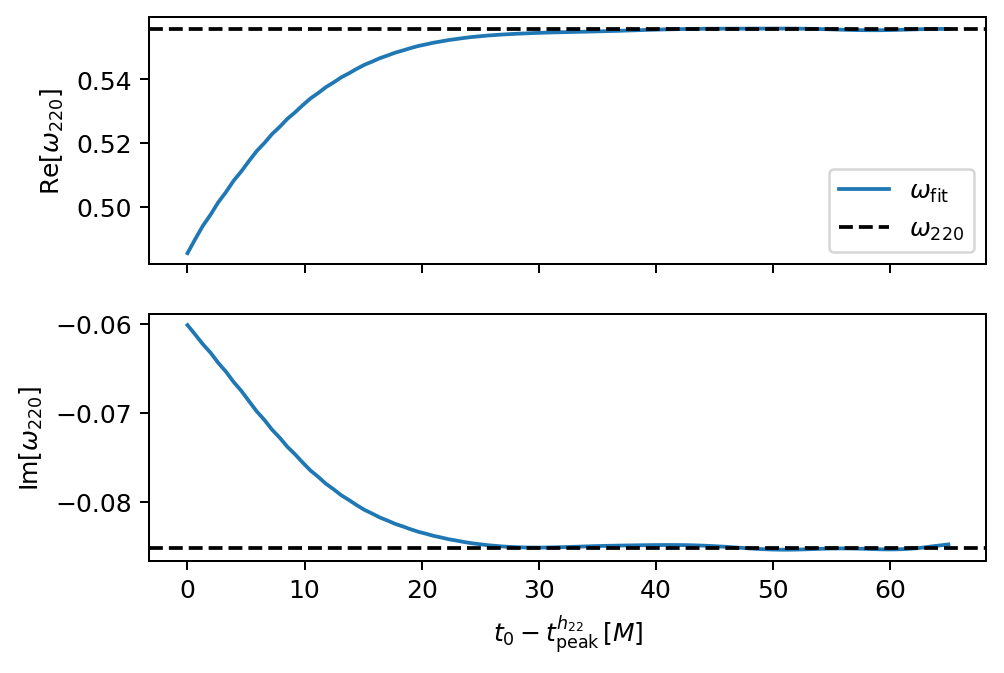

In [5]:
fig, axs = plt.subplots(2, 1, dpi=180, sharex=True)

axs[0].plot(t0_list, np.real(omega_fit_list), label='$\omega_\mathrm{fit}$')
axs[0].axhline(np.real(omega_target), c='k', ls='--', label='$\omega_{220}$')

axs[1].plot(t0_list, np.imag(omega_fit_list))
axs[1].axhline(np.imag(omega_target), c='k', ls='--')

axs[1].set_xlabel('$t_0 - t_\mathrm{peak}^{h_{22}}\, [M]$')
axs[0].set_ylabel('$\mathrm{Re}[\omega_{220}]$')
axs[1].set_ylabel('$\mathrm{Im}[\omega_{220}]$')

_ = axs[0].legend()

In [6]:
def delta_omega(omega_fit, omega_target):
    
    r_fit = np.real(omega_fit)
    i_fit = np.imag(omega_fit)
    
    r_target = np.real(omega_target)
    i_target = np.imag(omega_target)
    
    return np.sqrt(((r_fit-r_target)/r_target)**2 + ((i_fit-i_target)/i_target)**2)

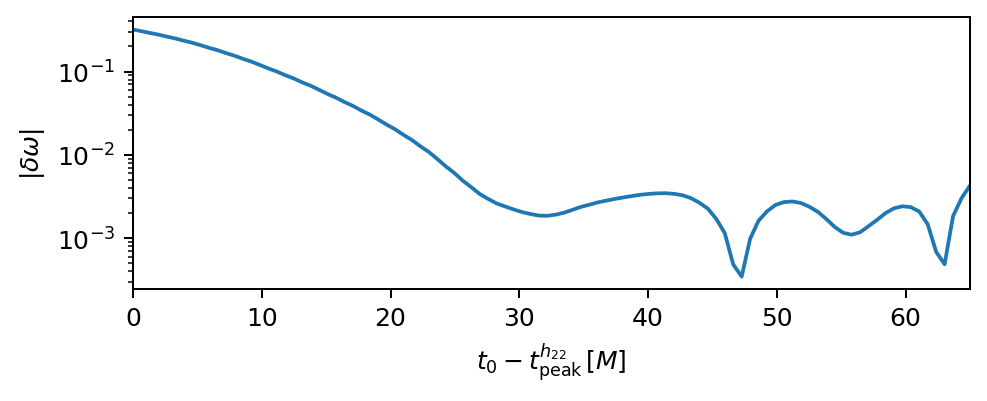

In [7]:
fig, ax = plt.subplots(figsize=(6,2), dpi=180)

ax.plot(t0_list, delta_omega(omega_fit_list, omega_target))

ax.set_yscale('log')

ax.set_xlim(t0_list[0], t0_list[-1])

ax.set_xlabel('$t_0 - t_\mathrm{peak}^{h_{22}}\, [M]$')
_ = ax.set_ylabel('$|\delta \omega|$')

In [8]:
omega_fit_dict = {}
t0_list = np.linspace(-10, 50, 120)

for N in range(0, 8):
    
    omega_fit_dict[N] = []
    
    modes = [(2,2,n,1) for n in range(1,N+1)]
    
    for t0 in t0_list:
        omega_fit_dict[N].append(qnmfits.free_frequency_fit(
            sim.times, 
            sim.h[2,2], 
            t0=t0,
            modes=modes,
            Mf=sim.Mf,
            chif=sim.chif_mag
        ))
    
    omega_fit_dict[N] = np.array(omega_fit_dict[N])

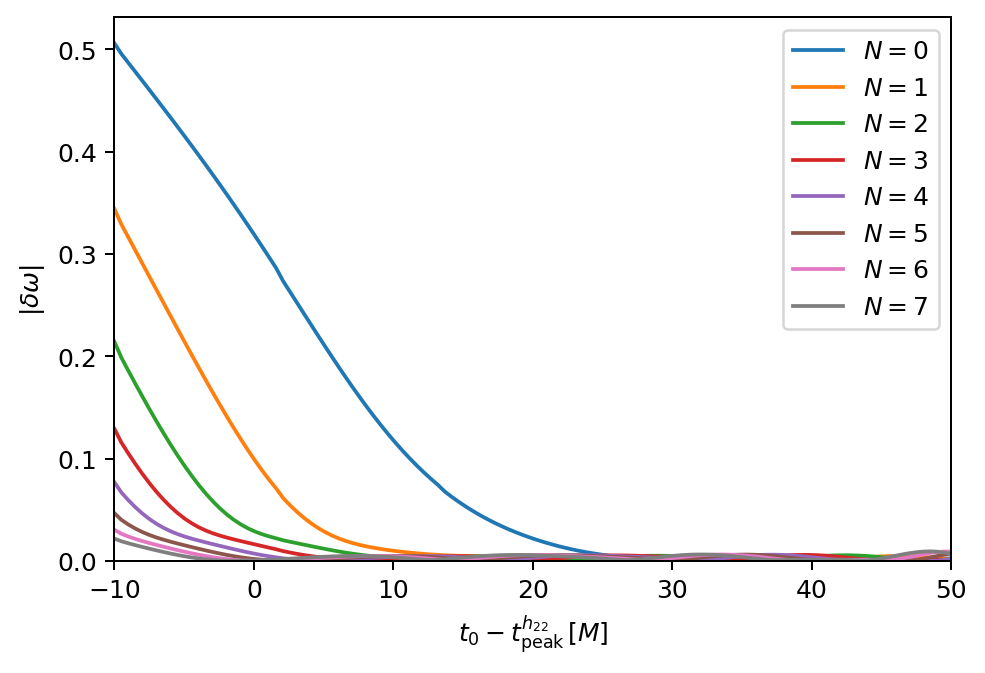

In [9]:
fig, ax = plt.subplots(dpi=180)

for N, omega_fit_list in omega_fit_dict.items():
    if N in [0,1,2,3,4,5,6,7]:
        ax.plot(t0_list, delta_omega(omega_fit_list, omega_target), label=f'$N = {N}$')

# ax.set_yscale('log')
ax.set_ylim(0)

ax.set_xlim(t0_list[0], t0_list[-1])

ax.set_xlabel('$t_0 - t_\mathrm{peak}^{h_{22}}\, [M]$')
ax.set_ylabel('$|\delta \omega|$')

_ = ax.legend()